In [4]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

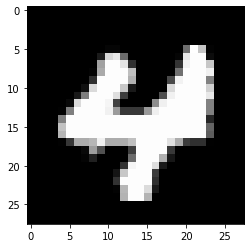

In [5]:
train_images = np.loadtxt('./data/train_images.txt') # incarcam imaginile
train_labels = np.loadtxt('./data/train_labels.txt', 'float').astype(int) # incarcam etichetele avand


test_images = np.loadtxt('./data/test_images.txt') # incarcam imaginile
test_labels = np.loadtxt('./data/test_labels.txt', 'float').astype(int) # incarcam etichetele avand
image = train_images[0, :] # prima imagine 
image = np.reshape(image, (28, 28)) 
plt.imshow(image.astype(np.uint8), cmap='gray') 
plt.show()

In [14]:
def values_to_bins(X, num_bins):
    
    bins = np.linspace(start=0, stop=255, num = num_bins)
    X_to_bins = np.digitize(X, bins)
    
    return X_to_bins
    

In [19]:
def train_and_predict(train_data, train_labels,test_data, test_labels, num_bins):
    
    train_images = values_to_bins(train_data, num_bins)
    test_images = values_to_bins(test_data, num_bins)
    
    model = MultinomialNB()
    model.fit(train_images, train_labels)
    train_score = model.score(train_images, train_labels)
    val_score = model.score(test_images, test_labels)
    
    print(f"Train Acc: {train_score}, Val Acc: {val_score}")
    
    return model, train_score, train_images


In [20]:
# 3.
train_and_predict(train_images, train_labels, test_images, test_labels, 5)

Train Acc: 0.844, Val Acc: 0.806


(MultinomialNB(),
 0.844,
 array([[1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        ...,
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1],
        [1, 1, 1, ..., 1, 1, 1]], dtype=int64))

In [21]:
# 4.
best_model = None
best_score = -1
processed_images = None

for num_bins in [3,5,7,9,11]:
    print(f"{num_bins} bins")
    model,train_score, processed_images = train_and_predict(train_images, train_labels, test_images, test_labels, num_bins)
    best_model = model if train_score > best_score else best_model
    

3 bins
Train Acc: 0.838, Val Acc: 0.802
5 bins
Train Acc: 0.844, Val Acc: 0.806
7 bins
Train Acc: 0.847, Val Acc: 0.81
9 bins
Train Acc: 0.845, Val Acc: 0.81
11 bins
Train Acc: 0.846, Val Acc: 0.814


In [22]:
#5.
predictions = best_model.predict(processed_images)

misclassified_examples = train_images[predictions != train_labels,:][:10]
wrong_predictions = predictions[predictions != train_labels][:10]

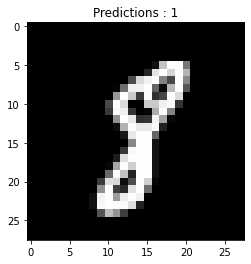

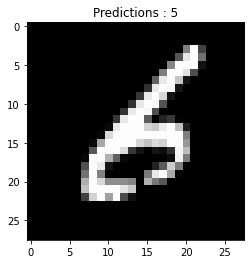

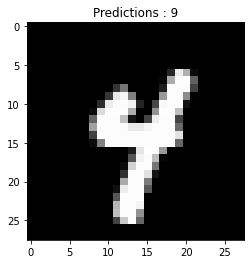

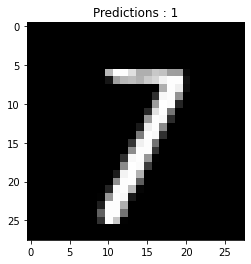

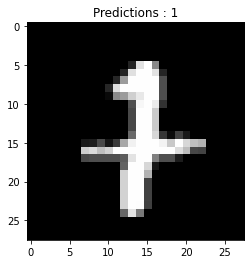

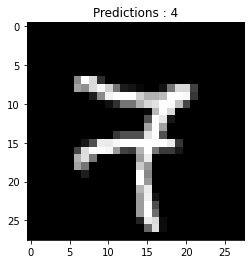

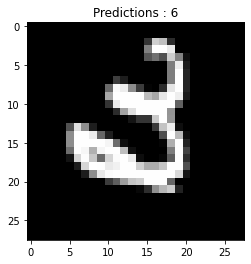

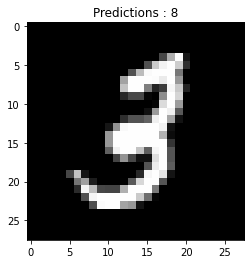

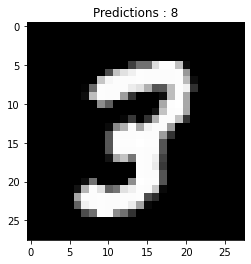

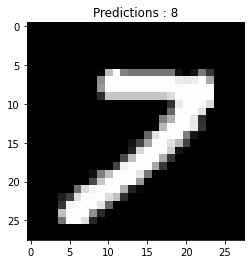

In [23]:
for example,wrong_label in zip(misclassified_examples, wrong_predictions):
    image = np.reshape(example, (28, 28)) 
    plt.imshow(image.astype(np.uint8), cmap='gray') 
    plt.title(f"Predictions : {wrong_label}")
    plt.show()


In [24]:
# 6. confusion_matrix

def confusion_matrix(predictions, labels):
    
    unique_classes = np.unique(labels)
    
    confusion_mat = np.zeros((len(unique_classes), len(unique_classes)))
    
    for cls in unique_classes:
        
        labels_for_cls = labels[labels == cls]
        preds_for_cls = predictions[ labels == cls]
        
        preds_per_class, counts = np.unique(preds_for_cls, return_counts=True)
        
        confusion_mat[cls, preds_per_class] = counts
        
        
        
    return confusion_mat


In [25]:
confusion_matrix(predictions, train_labels)

array([[ 86.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   5.,   0.],
       [  0., 113.,   3.,   0.,   0.,   2.,   0.,   0.,   2.,   0.],
       [  1.,   3.,  79.,   3.,   3.,   0.,   2.,   2.,   3.,   0.],
       [  1.,   0.,   0.,  84.,   0.,   3.,   2.,   0.,   8.,   1.],
       [  0.,   0.,   0.,   0.,  81.,   0.,   1.,   0.,   2.,  21.],
       [  0.,   2.,   0.,   4.,   2.,  59.,   6.,   1.,   7.,   2.],
       [  0.,   2.,   0.,   0.,   2.,   3.,  88.,   0.,   3.,   0.],
       [  0.,   4.,   1.,   0.,   1.,   0.,   0.,  90.,   3.,   5.],
       [  1.,   4.,   1.,   3.,   1.,   3.,   1.,   0.,  82.,   5.],
       [  2.,   2.,   1.,   1.,   8.,   0.,   0.,   1.,   4.,  84.]])

In [ ]:
import numpy as np
from sklearn.naive_bayes import MultinomialNB
from PIL import Image
import pandas as pd

def preprocess_images(image_paths, resize_shape):
    images = []
    for path in image_paths:
        image = Image.open(path)
        image = image.resize(resize_shape)
        image = np.array(image)
        images.append(image)
    return np.array(images)

def load_metadata(file_path):
    metadata = pd.read_csv(file_path)
    image_paths = metadata['Image'].values
    labels = metadata['Class'].values
    return image_paths, labels

# Load the training, validation, and test metadata files
train_image_paths, train_labels = load_metadata('train.csv')
val_image_paths, val_labels = load_metadata('val.csv')
test_image_paths, _ = load_metadata('test.csv')

# Preprocess images
resize_shape = (32, 32)
train_images = preprocess_images(train_image_paths, resize_shape)
val_images = preprocess_images(val_image_paths, resize_shape)
test_images = preprocess_images(test_image_paths, resize_shape)

# Flatten the image matrices for Naive Bayes
train_images_flattened = train_images.reshape(train_images.shape[0], -1)
val_images_flattened = val_images.reshape(val_images.shape[0], -1)
test_images_flattened = test_images.reshape(test_images.shape[0], -1)

# Train and predict using Naive Bayes
model = MultinomialNB()
model.fit(train_images_flattened, train_labels)
train_score = model.score(train_images_flattened, train_labels)
val_score = model.score(val_images_flattened, val_labels)

print(f"Train Acc: {train_score}, Val Acc: {val_score}")

# Make predictions on the test data
predictions = model.predict(test_images_flattened)
